<a href="https://colab.research.google.com/github/Suyash-28-commits/Backend/blob/main/Bay_of_Bengal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install argopy

In [ ]:
from argopy import DataFetcher , set_options
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error ,r2_score

In [ ]:
set_options(src='argovis')

In [ ]:
fetcher1 = DataFetcher().region([80, 100, 5, 25, 0, 1000])
data1 = fetcher1.load().data

In [ ]:
data1

<xarray.Dataset> Size: 2MB
Dimensions:          (N_POINTS: 25634)
Coordinates:
    TIME             (N_POINTS) datetime64[ns, UTC] 205kB 2025-08-20 14:05:55...
    LATITUDE         (N_POINTS) float64 205kB 12.45 12.45 12.45 ... 12.6 12.6
    LONGITUDE        (N_POINTS) float64 205kB 91.07 91.07 91.07 ... 90.83 90.83
  * N_POINTS         (N_POINTS) int64 205kB 0 1 2 3 ... 25630 25631 25632 25633
Data variables:
    CYCLE_NUMBER     (N_POINTS) int64 205kB 71 71 71 71 71 71 ... 74 74 74 74 74
    DATA_MODE        (N_POINTS) <U1 103kB 'R' 'R' 'R' 'R' ... 'R' 'R' 'R' 'R'
    DIRECTION        (N_POINTS) <U1 103kB 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A'
    PLATFORM_NUMBER  (N_POINTS) int64 205kB 7901125 7901125 ... 7901125 7901125
    POSITION_QC      (N_POINTS) int64 205kB 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
    PRES             (N_POINTS) float64 205kB 0.2 1.1 2.1 ... 155.0 165.1 175.1
    PSAL             (N_POINTS) float64 205kB 32.99 32.99 32.99 ... 34.84 34.9
    TEMP             (N_POINTS) float64 205kB 29.14 29.14 29.14 ... 16.68 15.81
    TIME_QC          (N_POINTS) int64 205kB 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
Attributes:
    DATA_ID:              ARGO
    DOI:                  http://doi.org/10.17882/42182
    Fetched_from:         https://argovis-api.colorado.edu
    Fetched_by:           root
    Fetched_date:         2025/09/20
    Fetched_constraints:  [x=80.00/100.00; y=5.00/25.00; z=0.0/1000.0; t=2025...
    Fetched_uri:          ['https://argovis-api.colorado.edu/argo?data=pressu...

In [ ]:
df = data1.to_dataframe().reset_index()

In [ ]:
pip install ydata-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 25.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 27.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 2.4 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=3b4f6a5bcada6d1bd51debdf233a7a3bfa3e9e20bf5a621779ec67cd35f40947
  Stored in directory: /root/.cache/pip/wheels/5f/d4/d7/4189b07b5902ee9f3ce0dbb14909fbe8037c39d6c63ffd49c9
Successfully built htmlmin
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.1
    Uninstalling scipy-1.16.1:
      

In [ ]:
df.head()

,N_POINTS,CYCLE_NUMBER,DATA_MODE,DIRECTION,PLATFORM_NUMBER,POSITION_QC,PRES,PSAL,TEMP,TIME_QC,TIME,LATITUDE,LONGITUDE
0,0,242,A,A,2902775,1,0.2,33.780998,29.127001,1,2025-08-06 05:18:44+00:00,7.551,90.115
1,1,242,A,A,2902775,1,1.1,33.780998,29.125000,1,2025-08-06 05:18:44+00:00,7.551,90.115
2,2,242,A,A,2902775,1,1.9,33.778999,29.124001,1,2025-08-06 05:18:44+00:00,7.551,90.115
3,3,242,A,A,2902775,1,2.8,33.779999,29.122000,1,2025-08-06 05:18:44+00:00,7.551,90.115
4,4,242,A,A,2902775,1,4.0,33.783001,29.124001,1,2025-08-06 05:18:44+00:00,7.551,90.115


In [ ]:
df.shape

(25572, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25572 entries, 0 to 25571
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   N_POINTS         25572 non-null  int64              
 1   CYCLE_NUMBER     25572 non-null  int64              
 2   DATA_MODE        25572 non-null  object             
 3   DIRECTION        25572 non-null  object             
 4   PLATFORM_NUMBER  25572 non-null  int64              
 5   POSITION_QC      25572 non-null  int64              
 6   PRES             25572 non-null  float64            
 7   PSAL             17784 non-null  float64            
 8   TEMP             17784 non-null  float64            
 9   TIME_QC          25572 non-null  int64              
 10  TIME             25572 non-null  datetime64[ns, UTC]
 11  LATITUDE         25572 non-null  float64            
 12  LONGITUDE        25572 non-null  float64            
dtypes: datetime64[ns

In [ ]:
df.isnull().sum()

,0
N_POINTS,0
CYCLE_NUMBER,0
DATA_MODE,0
DIRECTION,0
PLATFORM_NUMBER,0
POSITION_QC,0
PRES,0
PSAL,7788
TEMP,7788
TIME_QC,0


(<Figure size 900x540 with 1 Axes>,
 <Axes: xlabel='longitude', ylabel='latitude'>)

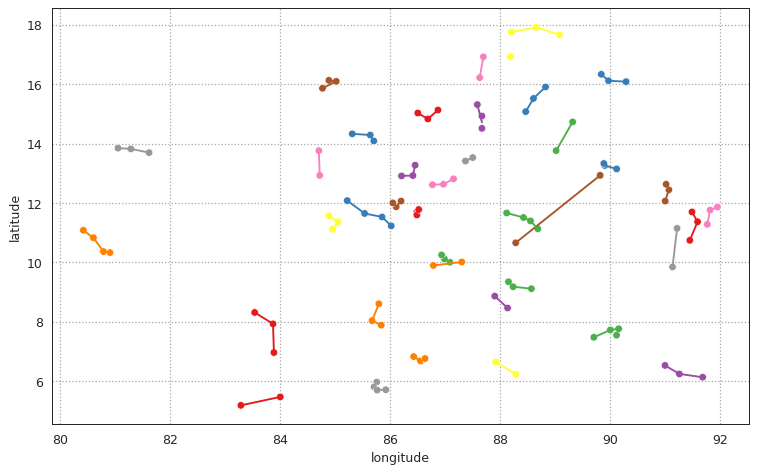

In [ ]:
fetcher1.plot('trajectory')

In [ ]:
df = df.drop(columns=['N_POINTS','CYCLE_NUMBER','DATA_MODE','DIRECTION','PLATFORM_NUMBER','POSITION_QC','TIME_QC','TIME'])

In [ ]:
df.head()

,PRES,PSAL,TEMP,LATITUDE,LONGITUDE
0,0.2,33.780998,29.127001,7.551,90.115
1,1.1,33.780998,29.125000,7.551,90.115
2,1.9,33.778999,29.124001,7.551,90.115
3,2.8,33.779999,29.122000,7.551,90.115
4,4.0,33.783001,29.124001,7.551,90.115


In [ ]:
X = df[['LATITUDE','LONGITUDE','PRES','PSAL']]
y = df['TEMP']

In [ ]:
X= X[~y.isna()]
y = y.dropna()

In [ ]:
X.columns = X.columns.map(lambda x : str(x))

In [ ]:
trf1 = ColumnTransformer([
    ("imputer_PSAL",SimpleImputer(),[3]),
],remainder="passthrough")

In [ ]:
trf2 = DecisionTreeRegressor()

In [ ]:
random_forest = RandomForestRegressor()

In [ ]:
pipe = Pipeline([
    ('trf1',trf1),
    ('trf2',trf2),
])

In [ ]:
pipe2 = Pipeline([
    ('trf1',trf1),
    ('trf2',random_forest)

])

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
pipe.fit(X_train,y_train)

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('imputer_PSAL',
                                                  SimpleImputer(), [3])])),
                ('trf2', DecisionTreeRegressor())])

In [ ]:
pipe2.fit(X_train,y_train)

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('imputer_PSAL',
                                                  SimpleImputer(), [3])])),
                ('trf2', RandomForestRegressor())])

In [ ]:
y_pred_1 = pipe.predict(X_test)
y_pred_2 = pipe2.predict(X_test)

In [ ]:
print("R2 score for Decision Tree",r2_score(y_test,y_pred_1))
print("R2 score for Random Forest ",r2_score(y_test,y_pred_2))

R2 score for Decision Tree 0.9975808931441744
R2 score for Random Forest  0.9988433237274313


In [ ]:
print("RMSE score for Decision Tree",np.sqrt(mean_squared_error(y_test,y_pred_1)))
print("RMSE score for Random Forest ",np.sqrt(mean_squared_error(y_test,y_pred_2)))

RMSE score for Decision Tree 0.3672335625861566
RMSE score for Random Forest  0.25393394112450135


In [ ]:
import joblib
joblib.dump(pipe2, "temp_2_model.pkl")

from google.colab import files
files.download("temp_2_model.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df.head()

,PRES,PSAL,TEMP,LATITUDE,LONGITUDE
0,0.2,33.780998,29.127001,7.551,90.115
1,1.1,33.780998,29.125000,7.551,90.115
2,1.9,33.778999,29.124001,7.551,90.115
3,2.8,33.779999,29.122000,7.551,90.115
4,4.0,33.783001,29.124001,7.551,90.115


In [ ]:
X1 = df[["LATITUDE","LONGITUDE","PRES",'TEMP']]
y1 = df["PSAL"]

In [ ]:
X1.columns = X1.columns.map(lambda x : str(x))

In [ ]:
X1.head()

,LATITUDE,LONGITUDE,PRES,TEMP
0,7.551,90.115,0.2,29.127001
1,7.551,90.115,1.1,29.125000
2,7.551,90.115,1.9,29.124001
3,7.551,90.115,2.8,29.122000
4,7.551,90.115,4.0,29.124001


In [ ]:
X1 = X1[~y1.isna()]
y1 = y1.dropna()

In [ ]:
trf2 = ColumnTransformer([
    ('imputer_TEMP',SimpleImputer(),[3])
],remainder="passthrough")

In [ ]:
trf3 = DecisionTreeRegressor()

In [ ]:
trf4 = RandomForestRegressor()

In [ ]:
pipe3 = Pipeline([
    ('trf1',trf2),
    ('trf2',trf3)
])

In [ ]:
pipe4 = Pipeline([
    ('trf1',trf2),
    ('trf2',trf4)
])

In [ ]:
X1_train,X1_test,y1_train,y1_test = train_test_split(X1,y1,test_size=0.2,random_state=42)

In [ ]:
pipe3.fit(X1_train,y1_train)

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('imputer_TEMP',
                                                  SimpleImputer(), [3])])),
                ('trf2', DecisionTreeRegressor())])

In [ ]:
pipe4.fit(X1_train,y1_train)

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('imputer_TEMP',
                                                  SimpleImputer(), [3])])),
                ('trf2', RandomForestRegressor())])

In [ ]:
y_pred_1 = pipe3.predict(X1_test)
y_pred_2 = pipe4.predict(X1_test)

In [ ]:
print("R2 score for decision tree: ",r2_score(y1_test,y_pred_1))
print("R2 score for random forest: ",r2_score(y1_test,y_pred_2))

R2 score for decision tree:  0.9999529313880307
R2 score for random forest:  0.9999738651626177


In [ ]:
print("RMSE Score for decision tree: ",np.sqrt(mean_squared_error(y1_test,y_pred_1)))
print("RMSE Score for random forest: ",np.sqrt(mean_squared_error(y1_test,y_pred_2)))

RMSE Score for decision tree:  0.06885946626116729
RMSE Score for random forest:  0.05131069031157525


In [ ]:
import joblib
joblib.dump(pipe4, "psal_2_model.pkl")

from google.colab import files
files.download("psal_2_model.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
pip install huggingface_hub

In [ ]:
from huggingface_hub import login
login()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from huggingface_hub import upload_file

repo_id = "Suyash1120/Bay_Of_Bengal_model"  # replace with your repo
upload_file(
    path_or_fileobj=r"/content/psal_2_model.pkl",         # local file
    path_in_repo="psal_2_model.pkl",            # how it will appear online
    repo_id=repo_id,
    repo_type="model"
)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Processing Files (0 / 0)                : |          |  0.00B /  0.00B            

New Data Upload                         : |          |  0.00B /  0.00B            

  /content/psal_2_model.pkl             :   1%|1         | 1.34MB /  105MB            

CommitInfo(commit_url='https://huggingface.co/Suyash1120/Bay_Of_Bengal_model/commit/4520125a2867a4054ff6efadb496c3b9d86f9835', commit_message='Upload psal_2_model.pkl with huggingface_hub', commit_description='', oid='4520125a2867a4054ff6efadb496c3b9d86f9835', pr_url=None, repo_url=RepoUrl('https://huggingface.co/Suyash1120/Bay_Of_Bengal_model', endpoint='https://huggingface.co', repo_type='model', repo_id='Suyash1120/Bay_Of_Bengal_model'), pr_revision=None, pr_num=None)

In [ ]:
from huggingface_hub import upload_file

repo_id = "Suyash1120/Bay_Of_Bengal_model"  # replace with your repo
upload_file(
    path_or_fileobj=r"/content/temp_2_model.pkl",         # local file
    path_in_repo="temp_2_model.pkl",            # how it will appear online
    repo_id=repo_id,
    repo_type="model"
)

Processing Files (0 / 0)                : |          |  0.00B /  0.00B            

New Data Upload                         : |          |  0.00B /  0.00B            

  /content/temp_2_model.pkl             :   7%|7         | 9.34MB /  128MB            

CommitInfo(commit_url='https://huggingface.co/Suyash1120/Bay_Of_Bengal_model/commit/a35c06eef6d646d3f9857237e7f9a7cb08654c11', commit_message='Upload temp_2_model.pkl with huggingface_hub', commit_description='', oid='a35c06eef6d646d3f9857237e7f9a7cb08654c11', pr_url=None, repo_url=RepoUrl('https://huggingface.co/Suyash1120/Bay_Of_Bengal_model', endpoint='https://huggingface.co', repo_type='model', repo_id='Suyash1120/Bay_Of_Bengal_model'), pr_revision=None, pr_num=None)